<a href="https://colab.research.google.com/github/joshhowolahbi/ML-Secondary-School-Rankings-UK/blob/main/Component_Two.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Component 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn import metrics, neighbors, naive_bayes, preprocessing, linear_model
from matplotlib.ticker import PercentFormatter
print('setup complete')

setup complete


Examining the distributions of all numeric features.

In [ ]:
com_ofsted_df = pd.read_excel("./Clean Combined OFSTED.xlsx")
com_ofsted_df.head()

,URN,LA,GENDER,RELCHAR,PNORG,PNORB,PSENELSE,PSENELK,PNUMEAL,PNUMENGFL,PNUMUNCFL,PNUMFSMEVER,PNUMFSM,PERCTOT,PPERSABS10,TPUP,P8PUP,ATT8SCR,P8MEA,P8CILOW,P8CIUPP,EBACCAPS,PTL2BASICS_94,PTL2BASICS_95,PTEBACC_E_PTQ_EE,PTEBACC_94,PTEBACC_95,PT5EM_94,P8_BANDING,OVERALL_DESTPER,NOT_SUSTAINEDPER,UNKNOWNPER,OVERALL_DESTPER_DIS,NOT_SUSTAINEDPER_DIS,UNKNOWNPER_DIS,Rating
0,100049,202,Mixed,Does not apply,41.4,58.6,3.2,11.8,73.1,26.8,0.1,64.5,41.2,6.9,18.8,199,178,42.4,-0.09,-0.28,0.09,3.72,0.588,0.432,0.241,0.191,0.141,0.533,3,0.9,0.09,0.01,0.89,0.11,0.01,Good
1,100050,202,Girls,Does not apply,96.0,4.0,1.3,10.2,38.1,60.9,0.9,49.6,26.9,5.3,12.5,175,164,58.6,0.77,0.58,0.97,5.33,0.760,0.577,0.577,0.417,0.326,0.749,1,0.94,0.04,0.02,0.95,0.04,0.01,Good
2,100051,202,Mixed,Does not apply,45.0,55.0,3.6,11.1,82.6,17.4,0.0,69.0,43.0,6.7,19.2,154,139,42.1,-0.18,-0.40,0.03,3.77,0.591,0.403,0.604,0.201,0.071,0.526,3,0.86,0.08,0.05,0.85,0.09,0.06,Good
3,100052,202,Mixed,Does not apply,47.5,52.5,2.4,6.9,55.8,44.2,0.0,54.2,22.8,5.4,14,200,188,44.6,-0.06,-0.24,0.13,4.08,0.630,0.315,0.585,0.240,0.120,0.570,3,0.91,0.08,0.01,0.87,0.13,0,Good
4,100053,202,Mixed,Does not apply,33.7,66.3,6.2,13.4,28.2,70.3,1.5,47.1,26.2,6.3,18.5,136,128,47.2,-0.08,-0.30,0.14,4.29,0.662,0.471,0.515,0.368,0.265,0.625,3,0.95,0.04,0.01,0.9,0.07,0.03,Good


In [ ]:
com_ofsted_df.shape

(3167, 36)

- dropping non-numeric features

In [ ]:
num_df = com_ofsted_df.drop(columns=["GENDER", "RELCHAR", "Rating"])
num_df.head()

,URN,LA,PNORG,PNORB,PSENELSE,PSENELK,PNUMEAL,PNUMENGFL,PNUMUNCFL,PNUMFSMEVER,PNUMFSM,PERCTOT,PPERSABS10,TPUP,P8PUP,ATT8SCR,P8MEA,P8CILOW,P8CIUPP,EBACCAPS,PTL2BASICS_94,PTL2BASICS_95,PTEBACC_E_PTQ_EE,PTEBACC_94,PTEBACC_95,PT5EM_94,P8_BANDING,OVERALL_DESTPER,NOT_SUSTAINEDPER,UNKNOWNPER,OVERALL_DESTPER_DIS,NOT_SUSTAINEDPER_DIS,UNKNOWNPER_DIS
0,100049,202,41.4,58.6,3.2,11.8,73.1,26.8,0.1,64.5,41.2,6.9,18.8,199,178,42.4,-0.09,-0.28,0.09,3.72,0.588,0.432,0.241,0.191,0.141,0.533,3,0.9,0.09,0.01,0.89,0.11,0.01
1,100050,202,96.0,4.0,1.3,10.2,38.1,60.9,0.9,49.6,26.9,5.3,12.5,175,164,58.6,0.77,0.58,0.97,5.33,0.760,0.577,0.577,0.417,0.326,0.749,1,0.94,0.04,0.02,0.95,0.04,0.01
2,100051,202,45.0,55.0,3.6,11.1,82.6,17.4,0.0,69.0,43.0,6.7,19.2,154,139,42.1,-0.18,-0.40,0.03,3.77,0.591,0.403,0.604,0.201,0.071,0.526,3,0.86,0.08,0.05,0.85,0.09,0.06
3,100052,202,47.5,52.5,2.4,6.9,55.8,44.2,0.0,54.2,22.8,5.4,14,200,188,44.6,-0.06,-0.24,0.13,4.08,0.630,0.315,0.585,0.240,0.120,0.570,3,0.91,0.08,0.01,0.87,0.13,0
4,100053,202,33.7,66.3,6.2,13.4,28.2,70.3,1.5,47.1,26.2,6.3,18.5,136,128,47.2,-0.08,-0.30,0.14,4.29,0.662,0.471,0.515,0.368,0.265,0.625,3,0.95,0.04,0.01,0.9,0.07,0.03


In [ ]:
num_df.shape

(3167, 33)

- we are unable to plot the histograms using the for loop for some feature because of the non-numeric values present in some rows (i.e string value like SUPP, NE, LOWCOV). Hence, we are removing rows containing this non-numeric values to be able to run the loop

In [ ]:
string_row  = num_df.apply(lambda row : any([ isinstance(e, str) for e in row ]), axis=1)
new_num_df = num_df[~string_row]
new_num_df.shape

(2572, 33)

- plotting each feature

URN


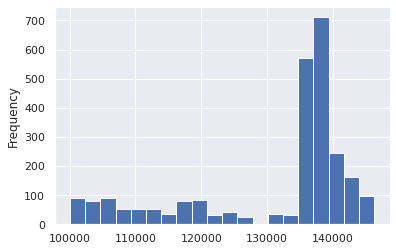

LA


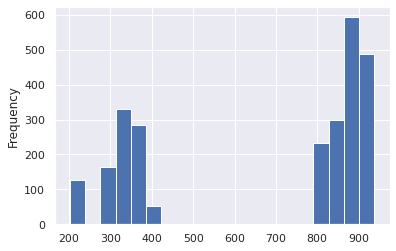

PNORG


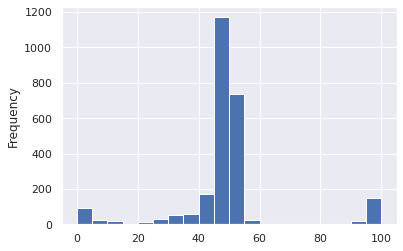

PNORB


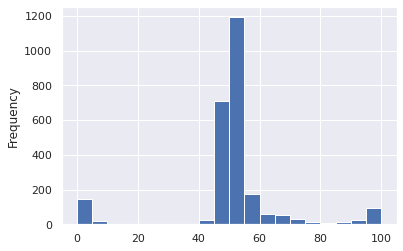

PSENELSE


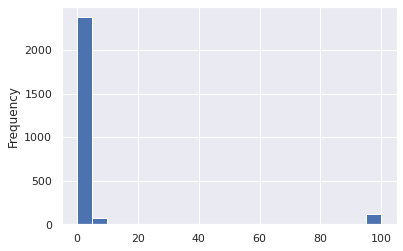

PSENELK


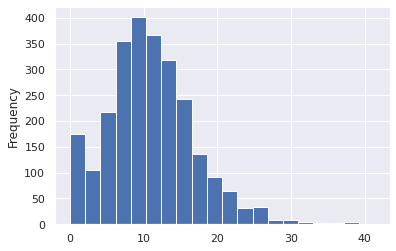

PNUMEAL


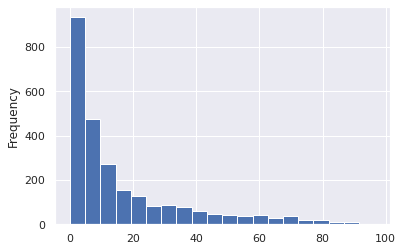

PNUMENGFL


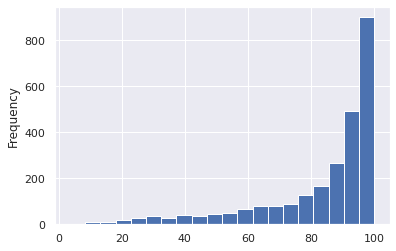

PNUMUNCFL


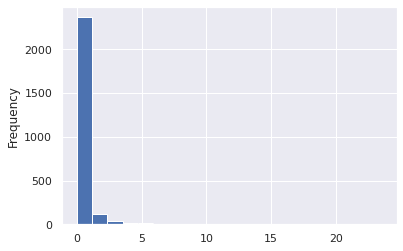

PNUMFSMEVER


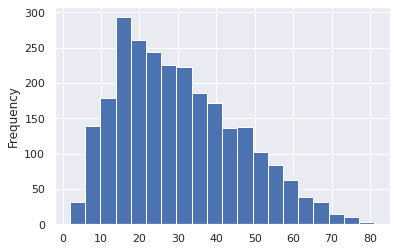

PNUMFSM


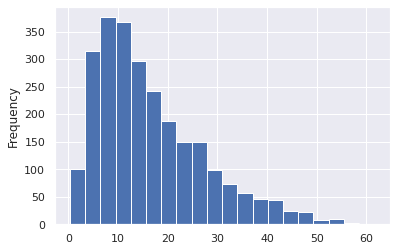

PERCTOT


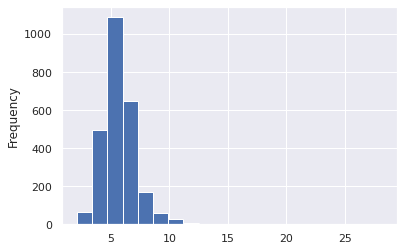

PPERSABS10


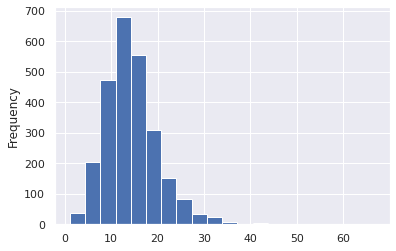

TPUP


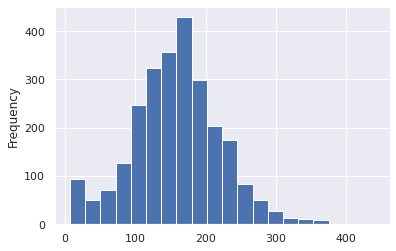

P8PUP


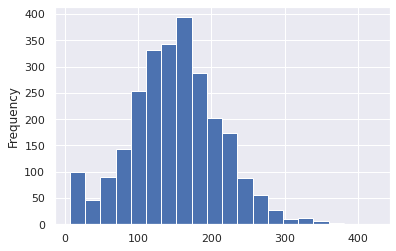

ATT8SCR


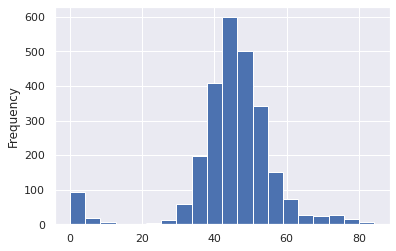

P8MEA


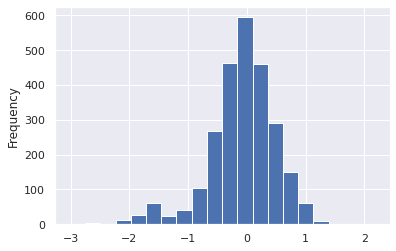

P8CILOW


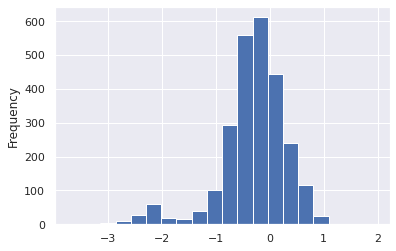

P8CIUPP


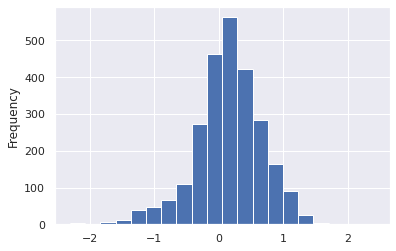

EBACCAPS


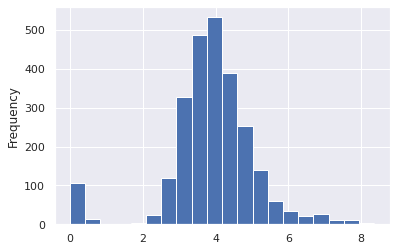

PTL2BASICS_94


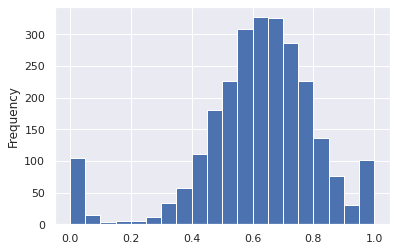

PTL2BASICS_95


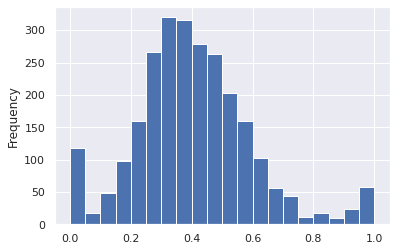

PTEBACC_E_PTQ_EE


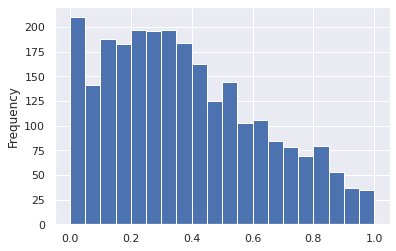

PTEBACC_94


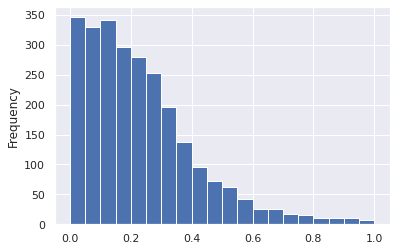

PTEBACC_95


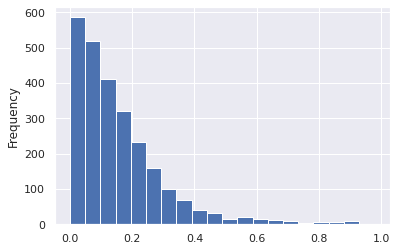

PT5EM_94


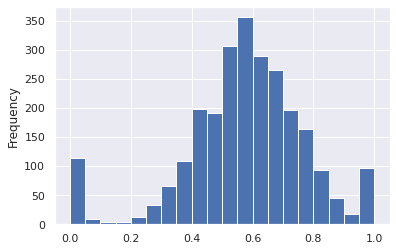

P8_BANDING


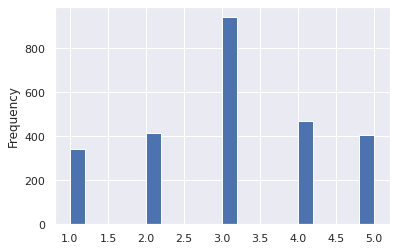

OVERALL_DESTPER


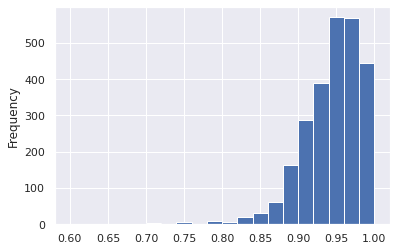

NOT_SUSTAINEDPER


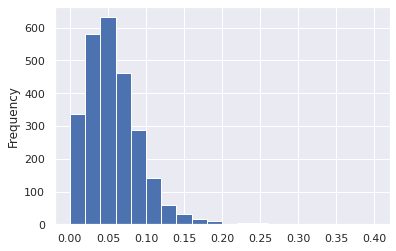

UNKNOWNPER


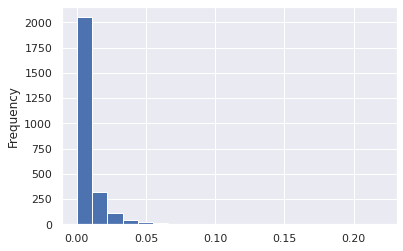

OVERALL_DESTPER_DIS


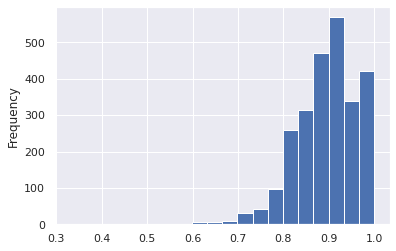

NOT_SUSTAINEDPER_DIS


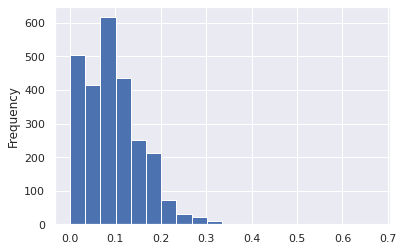

UNKNOWNPER_DIS


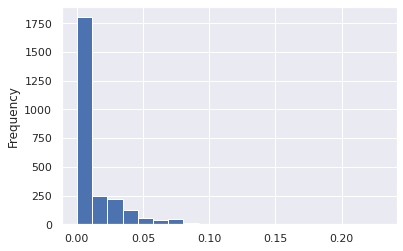

In [ ]:
col = new_num_df.columns
for i in col:
  print(i)
  new_num_df[i].plot.hist(bins = 20);
  plt.show()

comments
- The LA feature is concentrated at the edges of the plot leaving the center void
- The PNORG and PNORB feature have their peak at the centre with outliers on both sides
- The PSENELSE feature have outliers at 100
- The ATT8SCR feature has outliers at the begining of the distribution
- The EBACCAPS feature have outliers at the begining of the distribution
- The PTEBACC_E_PTQ_EE feature have multiple peaks
- the OVERALL_DESTPER feature have multiple peaks

Visualisation of the distribution of PNORG feature

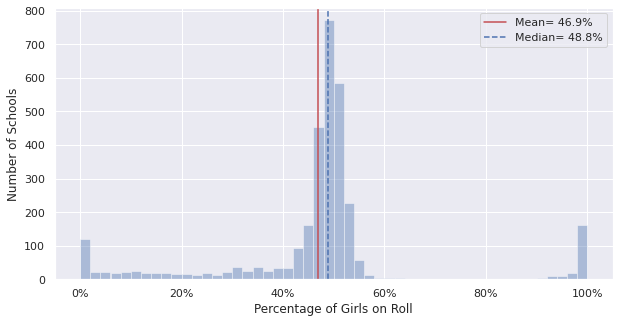

In [ ]:
pnorg_mean = num_df['PNORG'].mean()
pnorg_med = num_df['PNORG'].median()
plt.figure(figsize=(10,5))
num_df['PNORG'].plot.hist(bins=50, alpha=0.4)
plt.axvline(pnorg_mean, color = 'r')
plt.axvline(pnorg_med, color = 'b', linestyle = 'dashed')
plt.xlabel('Percentage of Girls on Roll')
plt.ylabel('Number of Schools')
plt.gca().xaxis.set_major_formatter(PercentFormatter(100))
plt.legend({'Mean= '+ str(round(pnorg_mean,1))+'%': pnorg_mean, 'Median= '+ str(round(pnorg_med,1))+'%': pnorg_med})
plt.show()

Examining the mixed features
> As seen above while trying to use the loop to plot the distribution for each features, we got error causing the loop to break because non-numeric values were mixed in some numeric features, these were handled in order for the loop to work
- Replacing non-numeric distribution with special numeric value
- From previous approach to finding the rows with non-numeric value, below is a dataframe containing them

In [ ]:
string_df= num_df[string_row]
string_df.head()

,URN,LA,PNORG,PNORB,PSENELSE,PSENELK,PNUMEAL,PNUMENGFL,PNUMUNCFL,PNUMFSMEVER,PNUMFSM,PERCTOT,PPERSABS10,TPUP,P8PUP,ATT8SCR,P8MEA,P8CILOW,P8CIUPP,EBACCAPS,PTL2BASICS_94,PTL2BASICS_95,PTEBACC_E_PTQ_EE,PTEBACC_94,PTEBACC_95,PT5EM_94,P8_BANDING,OVERALL_DESTPER,NOT_SUSTAINEDPER,UNKNOWNPER,OVERALL_DESTPER_DIS,NOT_SUSTAINEDPER_DIS,UNKNOWNPER_DIS
9,100092,202,11.8,88.2,100.0,0.0,20.6,79.4,0.0,91.2,67.6,27.9,81.4,17,16,3.4,-2.98,-3.60,-2.35,0.23,0.059,0.0,0.0,0.0,0.0,0.0,5,0.63,0.25,0.13,SUPP,SUPP,SUPP
15,100204,203,0.0,100.0,100.0,0.0,0.0,100.0,0.0,90.9,51.5,20.8,60,9,8,9.6,-1.90,-2.79,-1.01,0.19,0.000,0.0,0.0,0.0,0.0,0.0,5,0.7,0.3,0,SUPP,SUPP,SUPP
21,100307,204,34.8,65.2,100.0,0.0,23.5,76.5,0.0,74.1,65.9,5.6,15.2,22,21,1.3,-1.69,-2.24,-1.14,0.00,0.000,0.0,0.0,0.0,0.0,0.0,5,1,0,0,SUPP,SUPP,SUPP
22,100378,205,17.0,83.0,100.0,0.0,43.7,55.9,0.4,65.7,48.9,6.2,15.8,10,8,3.8,-1.52,-2.40,-0.63,0.25,0.000,0.0,0.0,0.0,0.0,0.0,5,1,0,0,SUPP,SUPP,SUPP
37,100654,208,27.3,72.7,100.0,0.0,34.7,65.3,0.0,76.9,66.9,8.9,19.8,15,11,1.2,-1.61,-2.37,-0.85,0.00,0.000,0.0,0.0,0.0,0.0,0.0,5,1,0,0,SUPP,SUPP,SUPP


- from above there are 595 rows with a non-numeric value. To check the unique string values in this dataframe, below code is written:

In [ ]:
a=[]
for b in string_df:
  for c in string_df[b]:
    if type(c) is str:
      a.append(c)
d= []
for i in a:
  if i not in d:
    d.append(i)
print(d)

['SUPP', 'SP']


- Now we can give special numeric value to (SUPP and SP) ranging from 0 - 1 based on observation
- Let SUPP = 0.5 and SP = 0.4

In [ ]:
rep_df = num_df.replace(['SUPP','SP'], [0.5,0.4])

- since we have the dataframe of rows containing the string values from (string_df), we can use below line of code to locate each of those rows to confirm replacement of the special numeric value

In [ ]:
rep_df.loc[[9,15,21,22,37]]

,URN,LA,PNORG,PNORB,PSENELSE,PSENELK,PNUMEAL,PNUMENGFL,PNUMUNCFL,PNUMFSMEVER,PNUMFSM,PERCTOT,PPERSABS10,TPUP,P8PUP,ATT8SCR,P8MEA,P8CILOW,P8CIUPP,EBACCAPS,PTL2BASICS_94,PTL2BASICS_95,PTEBACC_E_PTQ_EE,PTEBACC_94,PTEBACC_95,PT5EM_94,P8_BANDING,OVERALL_DESTPER,NOT_SUSTAINEDPER,UNKNOWNPER,OVERALL_DESTPER_DIS,NOT_SUSTAINEDPER_DIS,UNKNOWNPER_DIS
9,100092,202,11.8,88.2,100.0,0.0,20.6,79.4,0.0,91.2,67.6,27.9,81.4,17,16,3.4,-2.98,-3.60,-2.35,0.23,0.059,0.0,0.0,0.0,0.0,0.0,5.0,0.63,0.25,0.13,0.5,0.5,0.5
15,100204,203,0.0,100.0,100.0,0.0,0.0,100.0,0.0,90.9,51.5,20.8,60.0,9,8,9.6,-1.90,-2.79,-1.01,0.19,0.000,0.0,0.0,0.0,0.0,0.0,5.0,0.70,0.30,0.00,0.5,0.5,0.5
21,100307,204,34.8,65.2,100.0,0.0,23.5,76.5,0.0,74.1,65.9,5.6,15.2,22,21,1.3,-1.69,-2.24,-1.14,0.00,0.000,0.0,0.0,0.0,0.0,0.0,5.0,1.00,0.00,0.00,0.5,0.5,0.5
22,100378,205,17.0,83.0,100.0,0.0,43.7,55.9,0.4,65.7,48.9,6.2,15.8,10,8,3.8,-1.52,-2.40,-0.63,0.25,0.000,0.0,0.0,0.0,0.0,0.0,5.0,1.00,0.00,0.00,0.5,0.5,0.5
37,100654,208,27.3,72.7,100.0,0.0,34.7,65.3,0.0,76.9,66.9,8.9,19.8,15,11,1.2,-1.61,-2.37,-0.85,0.00,0.000,0.0,0.0,0.0,0.0,0.0,5.0,1.00,0.00,0.00,0.5,0.5,0.5


Examining the non-numeric features (GENDER, RELCHAR, Rating) and checking frequency of each value

In [ ]:
nnum_df = com_ofsted_df[["GENDER", "RELCHAR", "Rating"]]
nnum_df.head()

,GENDER,RELCHAR,Rating
0,Mixed,Does not apply,Good
1,Girls,Does not apply,Good
2,Mixed,Does not apply,Good
3,Mixed,Does not apply,Good
4,Mixed,Does not apply,Good


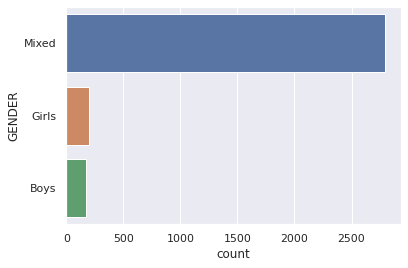

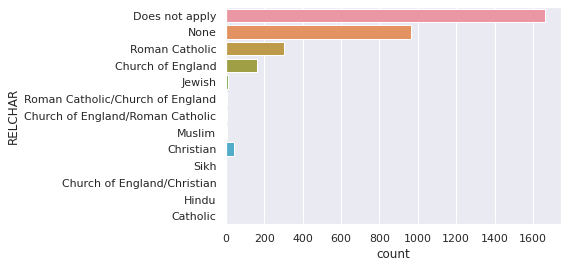

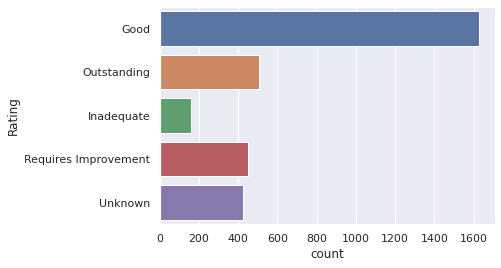

In [ ]:
for cols in nnum_df:
  sns.countplot(y = nnum_df[cols])
  plt.show()
# The plots are rotated because the x labels large and clashes with each other

Correlation between the proportion of children receiving free school meals in a school and that school’s Progress 8 score

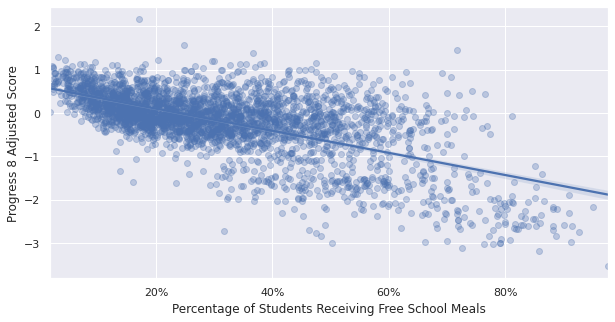

In [ ]:
plt.figure(figsize=(10,5))
sns.regplot(data=rep_df, x='PNUMFSMEVER', y='P8MEA',scatter_kws={'alpha':0.3} )
plt.xlabel('Percentage of Students Receiving Free School Meals')
plt.ylabel('Progress 8 Adjusted Score')
plt.gca().xaxis.set_major_formatter(PercentFormatter(100))

- Correlation

In [ ]:
rep_df['PNUMFSMEVER'].corr(rep_df['P8MEA'], method = 'pearson')

-0.6239265805985821

> A large absolute value of the correlation indicates a stronger correlation between the two features and the result indicates a negative correlation, therefore this can be referred to as a **strong negative correlation** where large value of one feature correlates to small value of the other feature.

Correlation between a school’s Progress 8 score and its average Attainment 8 score

In [ ]:
rep_df['P8MEA'].corr(rep_df['ATT8SCR'], method = 'pearson')

0.9067677566215945

> The above result indicates that the correllation between a school's Progress 8 score and its average Attainment 8 score is a **strong positive correlation**, that is an increase in one feature corresponds to an increase in the other feature 

Violin plot to examine the relationship between the Progress 8 score (P8MEA) and the banding (P8_BANDING). 

Text(0, 0.5, 'Progress 8 Measure After adjustment')

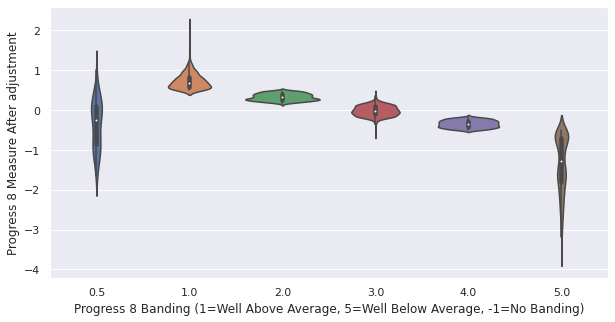

In [ ]:
plt.figure(figsize=(10,5))
sns.violinplot(x="P8_BANDING", y="P8MEA", data=rep_df)
plt.xlabel('Progress 8 Banding (1=Well Above Average, 5=Well Below Average, -1=No Banding)')
plt.ylabel('Progress 8 Measure After adjustment')

Incorporating the data in the sheet “la_and_region_codes_meta” to discover which Local Authority (LA) has the highest and lowest average Attainment 8 score and the highest and lowest Progress 8 score and also their region.

In [ ]:
la_df = pd.read_csv('./la_and_region_codes_meta.csv')
la_df.head()

,LEA,LA Name,REGION,REGION NAME
0,841,Darlington,1,North East A
1,840,County Durham,1,North East A
2,805,Hartlepool,1,North East A
3,806,Middlesbrough,1,North East A
4,807,Redcar and Cleveland,1,North East A


- highest average Attainment 8 score

In [ ]:
rep_df.loc[rep_df['ATT8SCR']== rep_df['ATT8SCR'].max()]

,URN,LA,PNORG,PNORB,PSENELSE,PSENELK,PNUMEAL,PNUMENGFL,PNUMUNCFL,PNUMFSMEVER,PNUMFSM,PERCTOT,PPERSABS10,TPUP,P8PUP,ATT8SCR,P8MEA,P8CILOW,P8CIUPP,EBACCAPS,PTL2BASICS_94,PTL2BASICS_95,PTEBACC_E_PTQ_EE,PTEBACC_94,PTEBACC_95,PT5EM_94,P8_BANDING,OVERALL_DESTPER,NOT_SUSTAINEDPER,UNKNOWNPER,OVERALL_DESTPER_DIS,NOT_SUSTAINEDPER_DIS,UNKNOWNPER_DIS
2162,138051,302,100.0,0.0,0.1,1.5,37.7,61.0,1.3,2.7,1.1,4.0,5.0,103,75,85.1,0.91,0.62,1.2,8.42,1.0,1.0,0.99,0.99,0.99,1.0,1.0,0.99,0.0,0.01,0.5,0.5,0.5


In [ ]:
la_df.loc[la_df['LEA'] == 302, ['LA Name', 'REGION', 'REGION NAME']]

,LA Name,REGION,REGION NAME
101,Barnet,33,London North


- lowest score

In [ ]:
rep_df.loc[rep_df['ATT8SCR']== rep_df['ATT8SCR'].min()]

,URN,LA,PNORG,PNORB,PSENELSE,PSENELK,PNUMEAL,PNUMENGFL,PNUMUNCFL,PNUMFSMEVER,PNUMFSM,PERCTOT,PPERSABS10,TPUP,P8PUP,ATT8SCR,P8MEA,P8CILOW,P8CIUPP,EBACCAPS,PTL2BASICS_94,PTL2BASICS_95,PTEBACC_E_PTQ_EE,PTEBACC_94,PTEBACC_95,PT5EM_94,P8_BANDING,OVERALL_DESTPER,NOT_SUSTAINEDPER,UNKNOWNPER,OVERALL_DESTPER_DIS,NOT_SUSTAINEDPER_DIS,UNKNOWNPER_DIS
799,123345,931,35.3,64.7,100.0,0.0,11.8,88.2,0.0,50.7,41.2,9.9,32.3,6,6,0.0,-1.61,-2.63,-0.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.5,0.50,0.50,0.5,0.5,0.5
999,135015,888,32.0,68.0,99.2,0.8,30.5,69.5,0.0,47.0,32.0,7.6,20.2,7,7,0.0,-1.53,-2.48,-0.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.9,0.05,0.05,0.9,0.0,0.1


In [ ]:
la_df.loc[la_df['LEA']==931, ['LA Name', 'REGION', 'REGION NAME']]

,LA Name,REGION,REGION NAME
120,Oxfordshire,36,South East A


In [ ]:
la_df.loc[la_df['LEA']==888, ['LA Name', 'REGION', 'REGION NAME']]


,LA Name,REGION,REGION NAME
15,Lancashire,6,North West A


- highest Progress 8 score

In [ ]:
rep_df.loc[rep_df['P8MEA']== rep_df['P8MEA'].max()]

,URN,LA,PNORG,PNORB,PSENELSE,PSENELK,PNUMEAL,PNUMENGFL,PNUMUNCFL,PNUMFSMEVER,PNUMFSM,PERCTOT,PPERSABS10,TPUP,P8PUP,ATT8SCR,P8MEA,P8CILOW,P8CIUPP,EBACCAPS,PTL2BASICS_94,PTL2BASICS_95,PTEBACC_E_PTQ_EE,PTEBACC_94,PTEBACC_95,PT5EM_94,P8_BANDING,OVERALL_DESTPER,NOT_SUSTAINEDPER,UNKNOWNPER,OVERALL_DESTPER_DIS,NOT_SUSTAINEDPER_DIS,UNKNOWNPER_DIS
2824,141565,889,100.0,0.0,0.7,14.8,82.0,18.0,0.0,17.1,8.5,2.1,3.6,120,113,69.9,2.17,1.94,2.41,6.55,0.933,0.833,0.933,0.792,0.65,0.933,1.0,0.94,0.05,0.01,0.83,0.17,0.0


In [ ]:
la_df.loc[la_df['LEA'] == 889, ['LA Name', 'REGION', 'REGION NAME']]

,LA Name,REGION,REGION NAME
12,Blackburn with Darwen,6,North West A


- lowest score

In [ ]:
rep_df.loc[rep_df['P8MEA']== rep_df['P8MEA'].min()]

,URN,LA,PNORG,PNORB,PSENELSE,PSENELK,PNUMEAL,PNUMENGFL,PNUMUNCFL,PNUMFSMEVER,PNUMFSM,PERCTOT,PPERSABS10,TPUP,P8PUP,ATT8SCR,P8MEA,P8CILOW,P8CIUPP,EBACCAPS,PTL2BASICS_94,PTL2BASICS_95,PTEBACC_E_PTQ_EE,PTEBACC_94,PTEBACC_95,PT5EM_94,P8_BANDING,OVERALL_DESTPER,NOT_SUSTAINEDPER,UNKNOWNPER,OVERALL_DESTPER_DIS,NOT_SUSTAINEDPER_DIS,UNKNOWNPER_DIS
3033,143630,211,0.0,100.0,100.0,0.0,18.4,81.6,0.0,97.6,83.7,20.7,67.3,7,7,2.1,-3.53,-4.48,-2.58,0.26,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.86,0.0,0.14,0.5,0.5,0.5


In [ ]:
la_df.loc[la_df['LEA'] == 211, ['LA Name', 'REGION', 'REGION NAME']]

,LA Name,REGION,REGION NAME
100,Tower Hamlets,32,London East


Combining all regions into one

In [ ]:
la_df['ATT8SCR'] = rep_df['ATT8SCR']
la_df.head()

,LEA,LA Name,REGION,REGION NAME,ATT8SCR
0,841,Darlington,1,North East A,42.4
1,840,County Durham,1,North East A,58.6
2,805,Hartlepool,1,North East A,42.1
3,806,Middlesbrough,1,North East A,44.6
4,807,Redcar and Cleveland,1,North East A,47.2


In [ ]:
la_df.groupby('REGION NAME').size()

REGION NAME
East Midlands A                    4
East Midlands B                    5
East of England A                  6
East of England B                  5
London Central                     7
London East                       10
London North                       4
London South                       6
London West                        6
North East A                       6
North East B                       6
North West A                       4
North West B                      10
North West C                       9
North Yorkshire and The Humber     6
South East A                       9
South East B                       4
South East C                       2
South East D                       4
South West A                       8
South West B                       7
South and West Yorkshire           9
West Midlands A                    4
West Midlands B                    2
West Midlands C                    8
dtype: int64

In [ ]:
regions = ['London','South East','East of England','South West','East Midlands','West Midlands','Yorkshire','North West','North East']
for i in regions:
  la_df.loc[la_df['REGION NAME'].str.contains(i), 'REGION NAME']=i
la_df.groupby('REGION NAME').size()

REGION NAME
East Midlands       9
East of England    11
London             33
North East         12
North West         23
South East         19
South West         15
West Midlands      14
Yorkshire          15
dtype: int64

In [ ]:
re_a8_df = la_df[['REGION NAME','ATT8SCR']]
re_a8_df.head(10)

,REGION NAME,ATT8SCR
0,North East,42.4
1,North East,58.6
2,North East,42.1
3,North East,44.6
4,North East,47.2
5,North East,63.4
6,North East,48.3
7,North East,46.2
8,North East,54.6
9,North East,3.4


Text(0, 0.5, 'Average Attainment 8 Score')

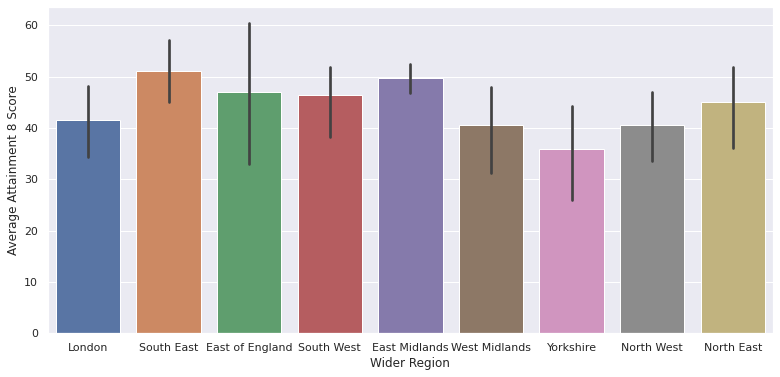

In [ ]:
plt.figure(figsize=(13,6))
sns.barplot(x="REGION NAME", y="ATT8SCR", data=re_a8_df, ci=95, order= regions)
plt.xlabel('Wider Region')
plt.ylabel('Average Attainment 8 Score')